# Marginals can be confusing

This notebook discusses some aspects of the example in `02_logistic_regression`. 

At some point, the following plot with the marginal posterior for the slopes is shown:

![](../imgs/clinton_results.png)

There we comment that $P(\beta_{\text{democrat}} > \beta_{\text{republican}}) \approx 0.99$ and $P(\beta_{\text{democrat}} > \beta_{\text{independent}})) \approx 0.99$, which may be a little unintuitive if you look at the overlap between the marginal densities where the overlap areas are both clearly above 0.01. 

For reference, the following densities have an overlap of $\approx 0.01$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

from scipy.integrate import simpson

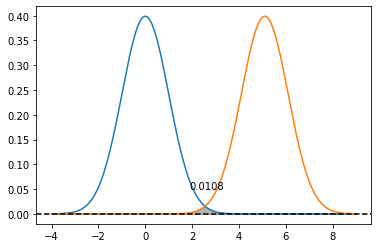

In [2]:
mu1 = 0
mu2 = 5.1
x = np.linspace(-4, 9, num=1000)

pdf1 = st.norm(loc=mu1).pdf(x)
pdf2 = st.norm(loc=mu2).pdf(x)

plt.plot(x, pdf1)
plt.plot(x, pdf2)

y = np.minimum(pdf1, pdf2)
area = simpson(y, x)

plt.annotate(round(area, 4), (2.6, 0.05), ha="center")

plt.fill_between(x, y, color="#a3a3a3", alpha=0.8)
plt.axhline(y=0, ls="--", c="k");

The following plot, showing draws from the joint posterior, is much more intuitive. Orange dots represent draws where the slope for Republican (or Independent) is greater than the slope for Democrat. The contrast between the few oranges versus the greatest majority of blues makes it easier to see that $P(\beta_{\text{democrat}} > \beta_{\text{republican}})$  and $P(\beta_{\text{democrat}} > \beta_{\text{independent}})$ are both very close to 1.

![](../imgs/clinton_party_joint.png)